<a href="https://colab.research.google.com/github/roopesh907/student-score-predictor/blob/main/Student_score_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv(r'/content/student_score_predictor_dataset.csv')

EDA

In [ ]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Distraction_Level,Score
0,4.1,95.4,7.1,Low,71.8
1,9.5,62.0,6.0,Low,82.5
2,7.5,57.2,10.2,Medium,70.0
3,6.2,74.5,8.0,Low,76.7
4,2.0,99.3,4.0,High,38.2


In [ ]:
df.shape
df

,Hours_Studied,Attendance,Sleep_Hours,Distraction_Level,Score
0,4.1,95.4,7.1,Low,71.8
1,9.5,62.0,6.0,Low,82.5
2,7.5,57.2,10.2,Medium,70.0
3,6.2,74.5,8.0,Low,76.7
4,2.0,99.3,4.0,High,38.2
...,...,...,...,...,...
145,0.9,76.1,7.3,Low,39.8
146,6.3,88.5,10.3,Low,73.6
147,5.3,60.8,5.8,Low,48.1
148,1.0,81.1,5.7,Low,44.8


In [ ]:
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours_Studied      150 non-null    float64
 1   Attendance         150 non-null    float64
 2   Sleep_Hours        150 non-null    float64
 3   Distraction_Level  150 non-null    object 
 4   Score              150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Hours_Studied,Attendance,Sleep_Hours,Distraction_Level,Score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


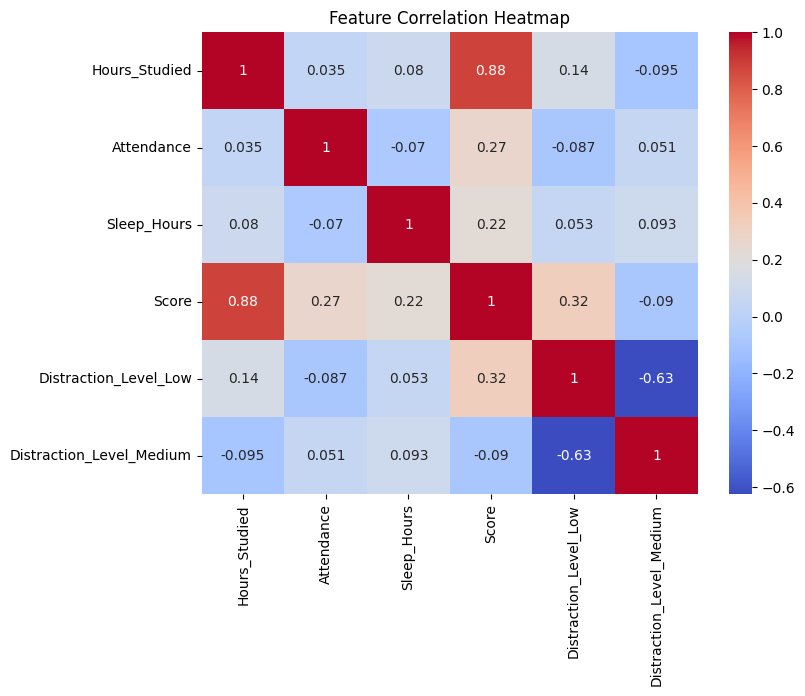

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_encoded = pd.get_dummies(df, columns=['Distraction_Level'], drop_first=True)

plt.figure(figsize=(8,6))

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

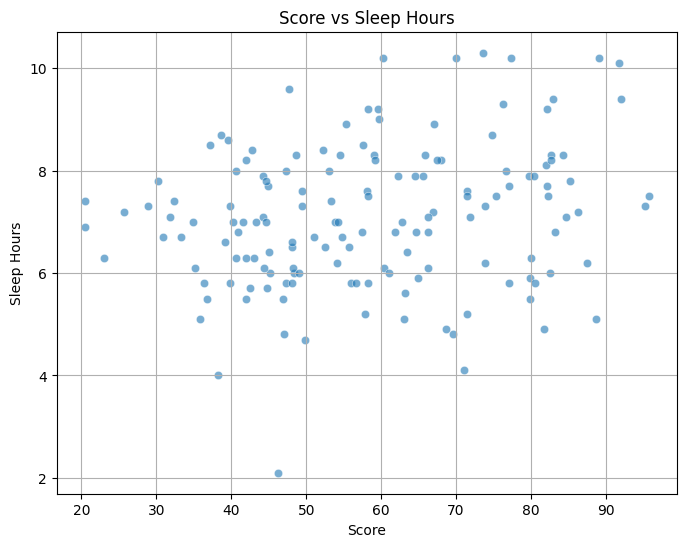

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Score', y='Sleep_Hours', data=df, alpha=0.6)
plt.title('Score vs Sleep Hours')
plt.xlabel('Score')
plt.ylabel('Sleep Hours')
plt.grid(True)
plt.show()

In [ ]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Distraction_Level',
       'Score'],
      dtype='object')


Data Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Distraction_Level'], drop_first=True)

In [ ]:
print(df_encoded.columns)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Score',
       'Distraction_Level_Low', 'Distraction_Level_Medium'],
      dtype='object')


In [ ]:
X = df_encoded.drop('Score', axis=1)
y = df_encoded['Score']

Model Prep

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

Testing Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 25.367156244154835
R2 Score: 0.9213098346685724


Data visualization

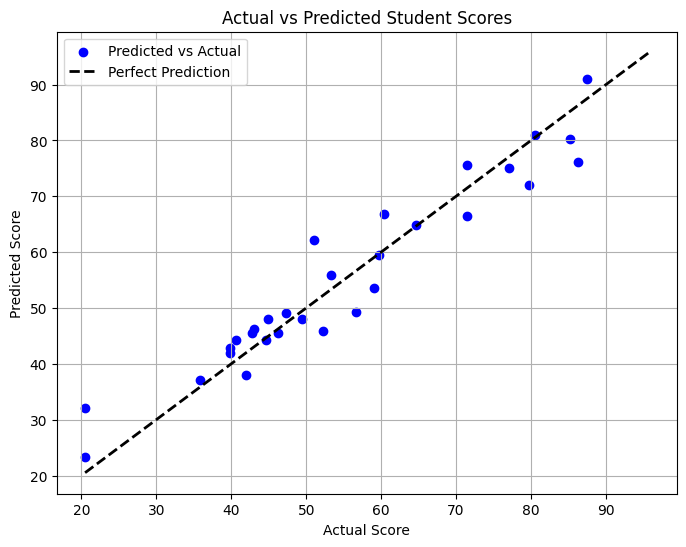

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Student Scores')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'student_score_predictor.pkl')

['student_score_predictor.pkl']